In [25]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
...

Ellipsis

In [26]:
names = ['sepal-length' , 'sepal-width' , 'petal-lenth' , 'petal-width' , 'class' ]

dataset = read_csv('iris.csv',names=names)

In [27]:
dataset

,sepal-length,sepal-width,petal-lenth,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [28]:
print(dataset.shape)

(150, 5)


In [29]:
print(dataset.head(20))

    sepal-length  sepal-width  petal-lenth  petal-width        class
0            5.1          3.5          1.4          0.2  Iris-setosa
1            4.9          3.0          1.4          0.2  Iris-setosa
2            4.7          3.2          1.3          0.2  Iris-setosa
3            4.6          3.1          1.5          0.2  Iris-setosa
4            5.0          3.6          1.4          0.2  Iris-setosa
5            5.4          3.9          1.7          0.4  Iris-setosa
6            4.6          3.4          1.4          0.3  Iris-setosa
7            5.0          3.4          1.5          0.2  Iris-setosa
8            4.4          2.9          1.4          0.2  Iris-setosa
9            4.9          3.1          1.5          0.1  Iris-setosa
10           5.4          3.7          1.5          0.2  Iris-setosa
11           4.8          3.4          1.6          0.2  Iris-setosa
12           4.8          3.0          1.4          0.1  Iris-setosa
13           4.3          3.0     

In [30]:
dataset.describe()

,sepal-length,sepal-width,petal-lenth,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


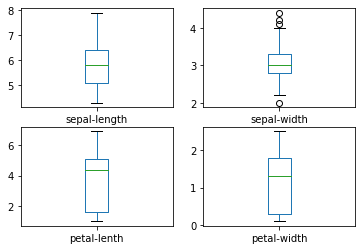

In [32]:
dataset.plot(kind='box' , subplots=True , layout=(2,2) , sharex= False , sharey = False)
pyplot.show()

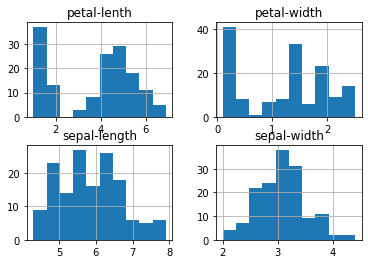

In [33]:
#histograms
dataset.hist()
pyplot.show()

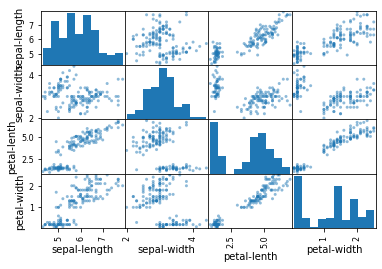

In [34]:
#scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [35]:
dataset

,sepal-length,sepal-width,petal-lenth,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [36]:
# Feature Engineering

array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7


In [50]:
# Model Training

X_train,X_validation,Y_train,Y_validation = train_test_split(X,Y,test_size=validation_size,random_state = seed)
dtc = DecisionTreeClassifier()


In [51]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [52]:
# Model Training
predictions = dtc.predict(X_validation)

In [53]:
#Printing Results
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.9
[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.83      0.91      0.87        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

